# Literature Review Survey Processing

In [1]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# comment

In [3]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [4]:
survey_df = pd.read_csv("./Copy of Literature Review (Responses) - Form Responses 1.csv", keep_default_na=False)
#fill in an NaNs with actual data so this keep default nonsense isnt needed



In [5]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Age (check all that apply),Social Agent Sex,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,no,Not specified,...,adult (12-24 weeks),always female,does not specify,Does not specify,WT (wild type),no,Yes,"Age, Sex","Yes, this one was tricky.",Subject strain
1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,no,VGluT3 KO,...,adult (12-24 weeks),always female,does not specify,Does not specify,WT (wild type),yes,Yes,None,"No, I feel confident, and I double-checked all...",
2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,C57BL/6 mixed with 129/SvEmsJ,...,adult (12-24 weeks),always female,does not specify,Does not specify,WT (wild type),yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",
3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,no,C57BL/6N,...,"adult (12-24 weeks), adult (24-40 weeks)",always female,singly-housed,Does not specify,WT (wild type),yes,Yes,Age,"No, I feel confident, and I double-checked all...",
4,3/25/2022 14:35:06,Schizophrenia-relevant behaviours of female mi...,"Olaya, Juan",2018-11,Naeliz Lopez,,yes,Mice,no,C57BL/6NTac,...,adult (24-40 weeks),always female,group-housed,Does not specify,WT (wild type),yes,Yes,"Age, Housing History, Type (WT vs transgenic)","Yes, this one was tricky.",Not sure on social agent strain and their hous...


In [6]:
survey_df.tail()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Age (check all that apply),Social Agent Sex,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
664,4/26/2022 14:45:54,Congenital lack of nNOS impairs long-term soci...,"Juch, Mathias",2009-11,Erika Wangia,,yes,Mice,no,C57BL/6J,...,juvenile (3-7 weeks or week not specified),"Uses both, Does not specifiy",does not specify,Does not specify,WT (wild type),yes,Yes,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",I don't understand whether nNOS-deficient coun...
665,4/30/2022 11:51:50,Altered social recognition memory and hypothal...,"Holman, Parker",2021-04,Erika Wangia,,yes,Rats,no,Sprague-Dawley,...,juvenile (3-7 weeks or week not specified),"Uses both, Does not specifiy",does not specify,Does not specify,WT (wild type),yes,Yes,Type (WT vs transgenic),"No, I feel confident, and I double-checked all...",
666,4/30/2022 12:29:10,Social Behavior in Prepubertal Neurexin 1α Def...,"Kight, Katherine",2021-12,Erika Wangia,,yes,Rats,no,Sprague Dawley,...,juvenile (3-7 weeks or week not specified),"Uses both, Does not specifiy",does not specify,Does not specify,WT (wild type),yes,Yes,"Age, Strain","No, I feel confident, and I double-checked all...",
667,5/3/2022 14:23:40,Competition between two memory traces for long...,"Engelmann, Mario",2009-01,Erika Wangia,,yes,Mice,no,C57BL/6JOlaHsd,...,juvenile (3-7 weeks or week not specified),"Uses both, Does not specifiy",does not specify,Does not specify,WT (wild type),yes,Yes,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",They keep the juvenile individually during the...
668,3/1/2022 10:11:55,A neural cell adhesion molecule–derived fibrob...,"Secher, Thomas",2006-09,Meghan Cum,,yes,Rats,no,Wister,...,juvenile (3-7 weeks or week not specified),"Uses both, Does not specifiy",group-housed,Does not specify,WT (wild type),no,,"Strain, Housing History, Type (WT vs transgenic)",,


- Updating the dates to years

In [7]:
survey_df["publication_year"] = survey_df["Publication Date (YYYY-MM)"].apply(lambda x: int(x.split("-")[0]))

#create extra columns 1) if mice were used, 2) if rats were used 

In [8]:
survey_df["Mice used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")

In [9]:
survey_df["Mice used"]

0      1
1      1
2      1
3      1
4      1
      ..
664    1
665    0
666    0
667    1
668    0
Name: Mice used, Length: 669, dtype: object

In [10]:
survey_df["Rats used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")

In [11]:
survey_df["Rats used"]

0      0
1      0
2      0
3      0
4      0
      ..
664    0
665    1
666    1
667    0
668    1
Name: Rats used, Length: 669, dtype: object

# Standarizing all the names

- Capitalizing all the names
    - Python treats all text that have different capitalization as seperate

In [12]:
all_strains = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].unique()

In [13]:
for strain in all_strains:
    print(strain)

Not specified
VGluT3 KO
C57BL/6 mixed with 129/SvEmsJ
C57BL/6N
C57BL/6NTac
C57BL/6J
C57Bl/6J
C57Bl/6 and 129/SvJ  & V1bRKO
C57BL/6BomTac
Long-Evans rats 
129/SvJ mixed C57BL/GJ
CD-1
BALB/c
CF-1
C57BL/6JOlaHsd 
C57BL/6
C57BL/6 
Does not specify
FVB/N
Avpr1b-Cre
does not specify 
Sprague-Dawley
Wistar rats
C57BL6/N
C57Bl/6 x 126Sv; C57BL/6J
Brattleboro rats
Hannover-Wistar rats
Lister hooded rats
C57BL6/J
C57/BL6
C57BL/6NHsd
Sprague–Dawley rats
Swiss
Wistar
NLG3 KO backcrossed with C57BL6/J
Mecp2 KO
C57BL6J
C57Bl6
Wistar RccHan rats
C57BL/6;FVB/NJ
129SvEvTac x C57BL/6Tac
129/SvEv
C57BL/6N mixed 129/Sv
C57BL/6J; Klk8 KO
C57BL/6J; C57BL/6 mixed 129/SvEv
Long-Evans
Wistar (Han) rats
Wistar Rats
C57BL/6;FVB;129S6
C57B6/J
C57-black6
Sprague Dawley
CD1
Wistar 
C57BL/6J; C57BL/6J mixed C57BL/6N
Wystar Kyoto rats
Not Specified
Harlan Sprague-Dawley
 C57BL/6
Wistar and Konárovice
129S6/SvEvTac mixed C57BL/6NCrl
Wistar–Imamichi rats
Wistar Kyoto More Immobile(WMI); Wistar Kyoto Less Immobile (WLI)

In [14]:
capitalized_all_strains = {strain: strain.upper().strip().encode('ascii', errors='ignore').decode("utf-8")  for strain in all_strains}

In [15]:
capitalized_all_strains

{'Not specified': 'NOT SPECIFIED',
 'VGluT3 KO': 'VGLUT3 KO',
 'C57BL/6 mixed with 129/SvEmsJ': 'C57BL/6 MIXED WITH 129/SVEMSJ',
 'C57BL/6N': 'C57BL/6N',
 'C57BL/6NTac': 'C57BL/6NTAC',
 'C57BL/6J': 'C57BL/6J',
 'C57Bl/6J': 'C57BL/6J',
 'C57Bl/6 and 129/SvJ  & V1bRKO': 'C57BL/6 AND 129/SVJ  & V1BRKO',
 'C57BL/6BomTac': 'C57BL/6BOMTAC',
 'Long-Evans rats ': 'LONG-EVANS RATS',
 '129/SvJ mixed C57BL/GJ': '129/SVJ MIXED C57BL/GJ',
 'CD-1': 'CD-1',
 'BALB/c': 'BALB/C',
 'CF-1': 'CF-1',
 'C57BL/6JOlaHsd ': 'C57BL/6JOLAHSD',
 'C57BL/6': 'C57BL/6',
 'C57BL/6 ': 'C57BL/6',
 'Does not specify': 'DOES NOT SPECIFY',
 'FVB/N': 'FVB/N',
 'Avpr1b-Cre': 'AVPR1B-CRE',
 'does not specify ': 'DOES NOT SPECIFY',
 'Sprague-Dawley': 'SPRAGUE-DAWLEY',
 'Wistar rats': 'WISTAR RATS',
 'C57BL6/N': 'C57BL6/N',
 'C57Bl/6 x 126Sv; C57BL/6J': 'C57BL/6 X 126SV; C57BL/6J',
 'Brattleboro rats': 'BRATTLEBORO RATS',
 'Hannover-Wistar rats': 'HANNOVER-WISTAR RATS',
 'Lister hooded rats': 'LISTER HOODED RATS',
 'C57BL6/J':

- Replacing all commas with semicolons

In [16]:
capitalized_all_strains = {key: value.replace(",", ";") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("-", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("WITH", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("W/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RATS", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RAT", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("MICE", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUE DAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUEDAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}


- All the different subjects should have a semicolon `;` seperating them.
    - So we will use this to identify multiple subjects

In [17]:
seperated_all_strains = {key: value.split(";") for key, value in capitalized_all_strains.items()}

In [18]:
seperated_all_strains

{'Not specified': ['NOT SPECIFIED'],
 'VGluT3 KO': ['VGLUT3 KO'],
 'C57BL/6 mixed with 129/SvEmsJ': ['C57BL6 MIXED  129SVEMSJ'],
 'C57BL/6N': ['C57BL6N'],
 'C57BL/6NTac': ['C57BL6NTAC'],
 'C57BL/6J': ['C57BL6J'],
 'C57Bl/6J': ['C57BL6J'],
 'C57Bl/6 and 129/SvJ  & V1bRKO': ['C57BL6 AND 129SVJ  & V1BRKO'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Long-Evans rats ': ['LONGEVANS '],
 '129/SvJ mixed C57BL/GJ': ['129SVJ MIXED C57BLGJ'],
 'CD-1': ['CD1'],
 'BALB/c': ['BALBC'],
 'CF-1': ['CF1'],
 'C57BL/6JOlaHsd ': ['C57BL6JOLAHSD'],
 'C57BL/6': ['C57BL6'],
 'C57BL/6 ': ['C57BL6'],
 'Does not specify': ['DOES NOT SPECIFY'],
 'FVB/N': ['FVBN'],
 'Avpr1b-Cre': ['AVPR1BCRE'],
 'does not specify ': ['DOES NOT SPECIFY'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Wistar rats': ['WISTAR '],
 'C57BL6/N': ['C57BL6N'],
 'C57Bl/6 x 126Sv; C57BL/6J': ['C57BL6 X 126SV', ' C57BL6J'],
 'Brattleboro rats': ['BTLEBORO '],
 'Hannover-Wistar rats': ['HANNOVERWISTAR '],
 'Lister hooded rats': ['LISTER HOODED '],
 'C5

- All the mixed mice should have the word "MIXED" in them so we will use that to identify the different strains

In [19]:
seperated_all_strains

{'Not specified': ['NOT SPECIFIED'],
 'VGluT3 KO': ['VGLUT3 KO'],
 'C57BL/6 mixed with 129/SvEmsJ': ['C57BL6 MIXED  129SVEMSJ'],
 'C57BL/6N': ['C57BL6N'],
 'C57BL/6NTac': ['C57BL6NTAC'],
 'C57BL/6J': ['C57BL6J'],
 'C57Bl/6J': ['C57BL6J'],
 'C57Bl/6 and 129/SvJ  & V1bRKO': ['C57BL6 AND 129SVJ  & V1BRKO'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Long-Evans rats ': ['LONGEVANS '],
 '129/SvJ mixed C57BL/GJ': ['129SVJ MIXED C57BLGJ'],
 'CD-1': ['CD1'],
 'BALB/c': ['BALBC'],
 'CF-1': ['CF1'],
 'C57BL/6JOlaHsd ': ['C57BL6JOLAHSD'],
 'C57BL/6': ['C57BL6'],
 'C57BL/6 ': ['C57BL6'],
 'Does not specify': ['DOES NOT SPECIFY'],
 'FVB/N': ['FVBN'],
 'Avpr1b-Cre': ['AVPR1BCRE'],
 'does not specify ': ['DOES NOT SPECIFY'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Wistar rats': ['WISTAR '],
 'C57BL6/N': ['C57BL6N'],
 'C57Bl/6 x 126Sv; C57BL/6J': ['C57BL6 X 126SV', ' C57BL6J'],
 'Brattleboro rats': ['BTLEBORO '],
 'Hannover-Wistar rats': ['HANNOVERWISTAR '],
 'Lister hooded rats': ['LISTER HOODED '],
 'C5

In [20]:
# Listing out all strains in a paper regardless of it was mixed or not
listing_all_strains = {}
# Seperating all the strains that were not in the same subject
subject_seperated_strains = {}

for key, value in seperated_all_strains.items():
    
    all_strains_for_paper = []
    all_subjects_for_paper = []
    
    for mixed_strain in value:
#         all_strains = [strain.strip() for strain in mixed_strain.split("MIXED")] 
        all_strains = [strain.strip().replace("  ", "_").replace(" ", "_") for strain in re.split(" X |MIXED|BACKCROSSED|AND|&", mixed_strain) if len(strain) >= 2]   
        all_strains_for_paper.extend(all_strains)
        all_subjects_for_paper.append(" mixed ".join(sorted(all_strains)))
        
    listing_all_strains[key] = all_strains_for_paper
    subject_seperated_strains[key] = all_subjects_for_paper

In [21]:
listing_all_strains

{'Not specified': ['NOT_SPECIFIED'],
 'VGluT3 KO': ['VGLUT3_KO'],
 'C57BL/6 mixed with 129/SvEmsJ': ['C57BL6', '129SVEMSJ'],
 'C57BL/6N': ['C57BL6N'],
 'C57BL/6NTac': ['C57BL6NTAC'],
 'C57BL/6J': ['C57BL6J'],
 'C57Bl/6J': ['C57BL6J'],
 'C57Bl/6 and 129/SvJ  & V1bRKO': ['C57BL6', '129SVJ', 'V1BRKO'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Long-Evans rats ': ['LONGEVANS'],
 '129/SvJ mixed C57BL/GJ': ['129SVJ', 'C57BLGJ'],
 'CD-1': ['CD1'],
 'BALB/c': ['BALBC'],
 'CF-1': ['CF1'],
 'C57BL/6JOlaHsd ': ['C57BL6JOLAHSD'],
 'C57BL/6': ['C57BL6'],
 'C57BL/6 ': ['C57BL6'],
 'Does not specify': ['DOES_NOT_SPECIFY'],
 'FVB/N': ['FVBN'],
 'Avpr1b-Cre': ['AVPR1BCRE'],
 'does not specify ': ['DOES_NOT_SPECIFY'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Wistar rats': ['WISTAR'],
 'C57BL6/N': ['C57BL6N'],
 'C57Bl/6 x 126Sv; C57BL/6J': ['C57BL6', '126SV', 'C57BL6J'],
 'Brattleboro rats': ['BTLEBORO'],
 'Hannover-Wistar rats': ['HANNOVERWISTAR'],
 'Lister hooded rats': ['LISTER_HOODED'],
 'C57BL6/J': ['C5

In [22]:
subject_seperated_strains

{'Not specified': ['NOT_SPECIFIED'],
 'VGluT3 KO': ['VGLUT3_KO'],
 'C57BL/6 mixed with 129/SvEmsJ': ['129SVEMSJ mixed C57BL6'],
 'C57BL/6N': ['C57BL6N'],
 'C57BL/6NTac': ['C57BL6NTAC'],
 'C57BL/6J': ['C57BL6J'],
 'C57Bl/6J': ['C57BL6J'],
 'C57Bl/6 and 129/SvJ  & V1bRKO': ['129SVJ mixed C57BL6 mixed V1BRKO'],
 'C57BL/6BomTac': ['C57BL6BOMTAC'],
 'Long-Evans rats ': ['LONGEVANS'],
 '129/SvJ mixed C57BL/GJ': ['129SVJ mixed C57BLGJ'],
 'CD-1': ['CD1'],
 'BALB/c': ['BALBC'],
 'CF-1': ['CF1'],
 'C57BL/6JOlaHsd ': ['C57BL6JOLAHSD'],
 'C57BL/6': ['C57BL6'],
 'C57BL/6 ': ['C57BL6'],
 'Does not specify': ['DOES_NOT_SPECIFY'],
 'FVB/N': ['FVBN'],
 'Avpr1b-Cre': ['AVPR1BCRE'],
 'does not specify ': ['DOES_NOT_SPECIFY'],
 'Sprague-Dawley': ['SPRAGUE_DAWLEY'],
 'Wistar rats': ['WISTAR'],
 'C57BL6/N': ['C57BL6N'],
 'C57Bl/6 x 126Sv; C57BL/6J': ['126SV mixed C57BL6', 'C57BL6J'],
 'Brattleboro rats': ['BTLEBORO'],
 'Hannover-Wistar rats': ['HANNOVERWISTAR'],
 'Lister hooded rats': ['LISTER_HOODED'],
 '

In [23]:
survey_df["all_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(listing_all_strains)
survey_df["per_subject_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(subject_seperated_strains)

In [24]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,no,Not specified,...,no,Yes,"Age, Sex","Yes, this one was tricky.",Subject strain,2003,1,0,[NOT_SPECIFIED],[NOT_SPECIFIED]
1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,no,VGluT3 KO,...,yes,Yes,None,"No, I feel confident, and I double-checked all...",,2019,1,0,[VGLUT3_KO],[VGLUT3_KO]
2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,C57BL/6 mixed with 129/SvEmsJ,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,"[C57BL6, 129SVEMSJ]",[129SVEMSJ mixed C57BL6]
3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,no,C57BL/6N,...,yes,Yes,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,[C57BL6N],[C57BL6N]
4,3/25/2022 14:35:06,Schizophrenia-relevant behaviours of female mi...,"Olaya, Juan",2018-11,Naeliz Lopez,,yes,Mice,no,C57BL/6NTac,...,yes,Yes,"Age, Housing History, Type (WT vs transgenic)","Yes, this one was tricky.",Not sure on social agent strain and their hous...,2018,1,0,[C57BL6NTAC],[C57BL6NTAC]


In [25]:
survey_df.to_csv("./proc/spread_sheets/literature_review_processed_strains.csv")

In [26]:
all_listed_strain_counts_df = pd.Series(Counter(chain(*survey_df["all_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [27]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
42,C57BL6J,157
128,WISTAR,149
119,SPRAGUE_DAWLEY,82
39,C57BL6,78
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,9


In [28]:
per_subject_strain_counts_df = pd.Series(Counter(chain(*survey_df["per_subject_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [29]:
per_subject_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
142,WISTAR,148
63,C57BL6J,137
135,SPRAGUE_DAWLEY,82
60,C57BL6,70
86,CD1,29
77,C57BL6N,20
136,SWISS,19
115,LONGEVANS,9
94,DOES_NOT_SPECIFY,9
121,NOT_SPECIFIED,8


- Checking why different amounts of "C57BL6J"
    - So there is less in `per_subject_strain_counts_df` because some of the "C57BL6J" are in a mixed group. But if you look at the total, it's all the same

In [30]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
42,C57BL6J,157
48,C57BL6JOLAHSD,6
44,C57BL6JC57BL6N129S6,2
49,C57BL6JRJ,2
4,129C57BL6J,1


In [31]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
63,C57BL6J,137
73,C57BL6JOLAHSD,6
55,C3HHEJ mixed C57BL6J,4
64,C57BL6J mixed C57BL6N,2
69,C57BL6JC57BL6N129S6,2


In [32]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

179

In [33]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

179

- Options
    - A list of tuples
    - A list of strings
    - https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe
        - Split list into rows and into strings
        - Or just split all the strains into rows

- Creating a row for each subject

In [34]:
all_processed_strains_df = survey_df.explode("all_processed_strains").reset_index()
per_subject_processed_strains_df = survey_df.explode("per_subject_processed_strains").reset_index()

In [35]:
all_processed_strains_df.head()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,no,...,no,Yes,"Age, Sex","Yes, this one was tricky.",Subject strain,2003,1,0,NOT_SPECIFIED,[NOT_SPECIFIED]
1,1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,no,...,yes,Yes,None,"No, I feel confident, and I double-checked all...",,2019,1,0,VGLUT3_KO,[VGLUT3_KO]
2,2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,C57BL6,[129SVEMSJ mixed C57BL6]
3,2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,129SVEMSJ,[129SVEMSJ mixed C57BL6]
4,3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,no,...,yes,Yes,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,C57BL6N,[C57BL6N]


In [36]:
per_subject_processed_strains_df.head()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,no,...,no,Yes,"Age, Sex","Yes, this one was tricky.",Subject strain,2003,1,0,[NOT_SPECIFIED],NOT_SPECIFIED
1,1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,no,...,yes,Yes,None,"No, I feel confident, and I double-checked all...",,2019,1,0,[VGLUT3_KO],VGLUT3_KO
2,2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,"[C57BL6, 129SVEMSJ]",129SVEMSJ mixed C57BL6
3,3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,no,...,yes,Yes,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,[C57BL6N],C57BL6N
4,4,3/25/2022 14:35:06,Schizophrenia-relevant behaviours of female mi...,"Olaya, Juan",2018-11,Naeliz Lopez,,yes,Mice,no,...,yes,Yes,"Age, Housing History, Type (WT vs transgenic)","Yes, this one was tricky.",Not sure on social agent strain and their hous...,2018,1,0,[C57BL6NTAC],C57BL6NTAC


In [37]:
all_processed_strains_df.to_csv("./proc/spread_sheets/literature_review_row_per_every_strain.csv")

In [38]:
per_subject_processed_strains_df.to_csv("./proc/spread_sheets/literature_review_row_per_mixed_strain.csv")

- Getting a list of strains with the highest counts

In [39]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=11)

,Strain,Counts
42,C57BL6J,157
128,WISTAR,149
119,SPRAGUE_DAWLEY,82
39,C57BL6,78
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,9


In [40]:
most_common_strains = list(all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=10)["Strain"])

In [41]:
most_common_strains

['C57BL6J',
 'WISTAR',
 'SPRAGUE_DAWLEY',
 'C57BL6',
 'CD1',
 'C57BL6N',
 'SWISS',
 '129SVJ',
 '129SV',
 'LONGEVANS']

In [42]:
all_processed_strains_df.head()

,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,no,...,no,Yes,"Age, Sex","Yes, this one was tricky.",Subject strain,2003,1,0,NOT_SPECIFIED,[NOT_SPECIFIED]
1,1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,no,...,yes,Yes,None,"No, I feel confident, and I double-checked all...",,2019,1,0,VGLUT3_KO,[VGLUT3_KO]
2,2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,C57BL6,[129SVEMSJ mixed C57BL6]
3,2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,...,yes,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,129SVEMSJ,[129SVEMSJ mixed C57BL6]
4,3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,no,...,yes,Yes,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,C57BL6N,[C57BL6N]


In [43]:
strain_year_count = all_processed_strains_df.groupby(['publication_year','all_processed_strains'], as_index=False).count()

In [44]:
strain_year_count.head()

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Mice used,Rats used,per_subject_processed_strains
0,2000,C57BL6J,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2000,SPRAGUE_DAWLEY,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2000,WISTAR,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [45]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

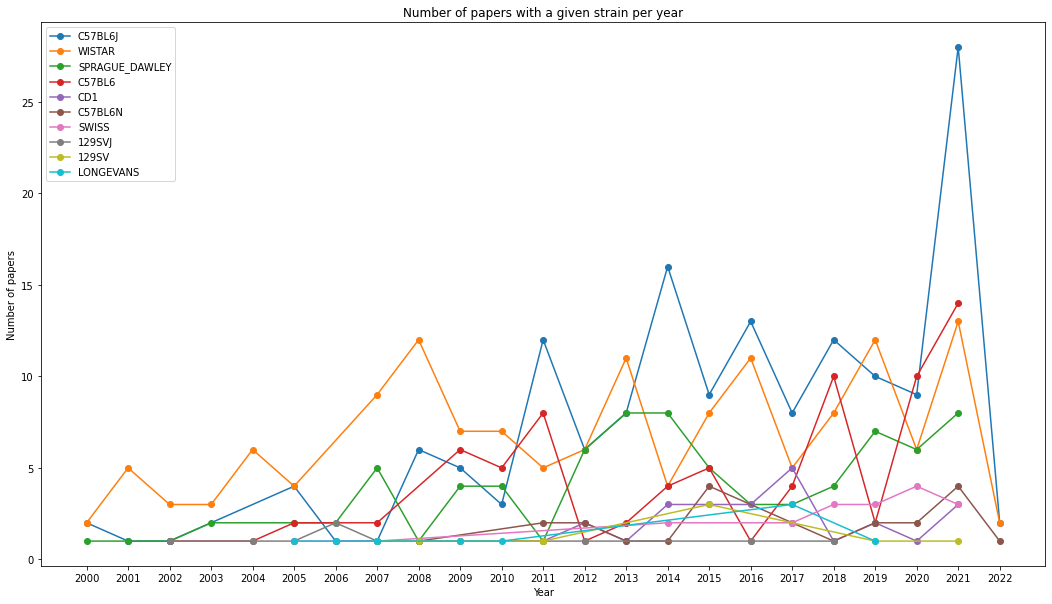

In [46]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]
    ax.plot(strain_df["publication_year"], strain_df["index"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_strain.png")

In [47]:
all_processed_strains_df["Publication Date (YYYY-MM)"][0]

'2003-05'

## Trends in Sex of the Subject

In [48]:
survey_df["Subject Sex"]

0         Female
1           Male
2      Uses both
3      Uses both
4      Uses both
         ...    
664    Uses both
665    Uses both
666    Uses both
667         Male
668    Uses both
Name: Subject Sex, Length: 669, dtype: object

In [49]:
sex_year_count = all_processed_strains_df.groupby(['publication_year','Subject Sex'], as_index=False).count()

In [50]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

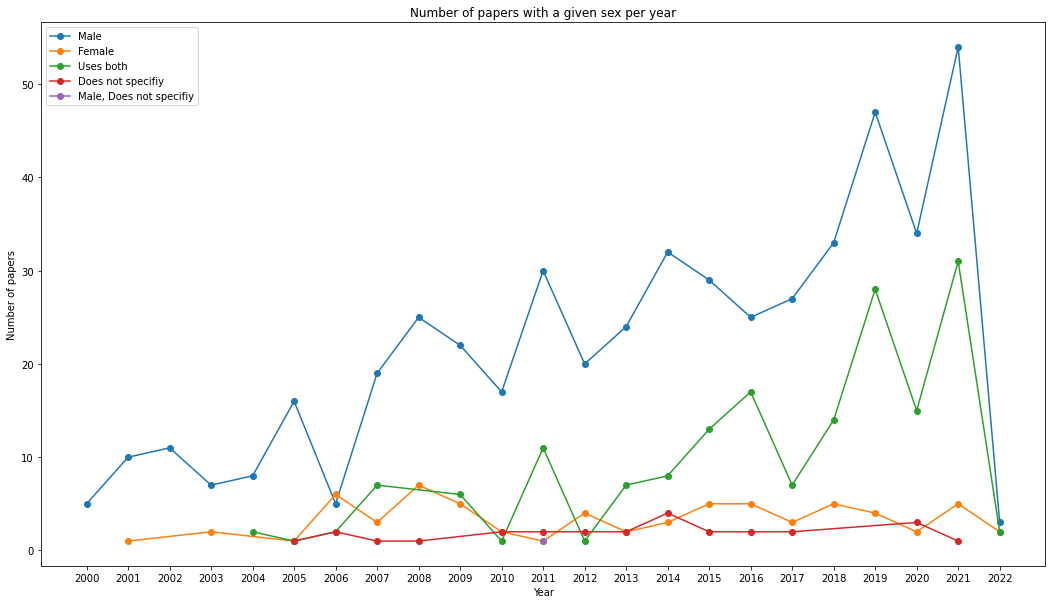

In [51]:
fig, ax = plt.subplots()

for sex in sex_year_count["Subject Sex"].unique():
    sex_df = sex_year_count[sex_year_count["Subject Sex"] == sex]
    ax.plot(sex_df["publication_year"], sex_df["index"], '-o', label=sex)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given sex per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_sex.png")

## Trends in Type of the Subject

In [52]:
survey_df["Subject Type"]

0                both
1                both
2                both
3                both
4                both
            ...      
664    WT (wild type)
665    WT (wild type)
666              both
667    WT (wild type)
668    WT (wild type)
Name: Subject Type, Length: 669, dtype: object

In [53]:
type_year_count = all_processed_strains_df.groupby(['publication_year','Subject Type'], as_index=False).count()

In [54]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

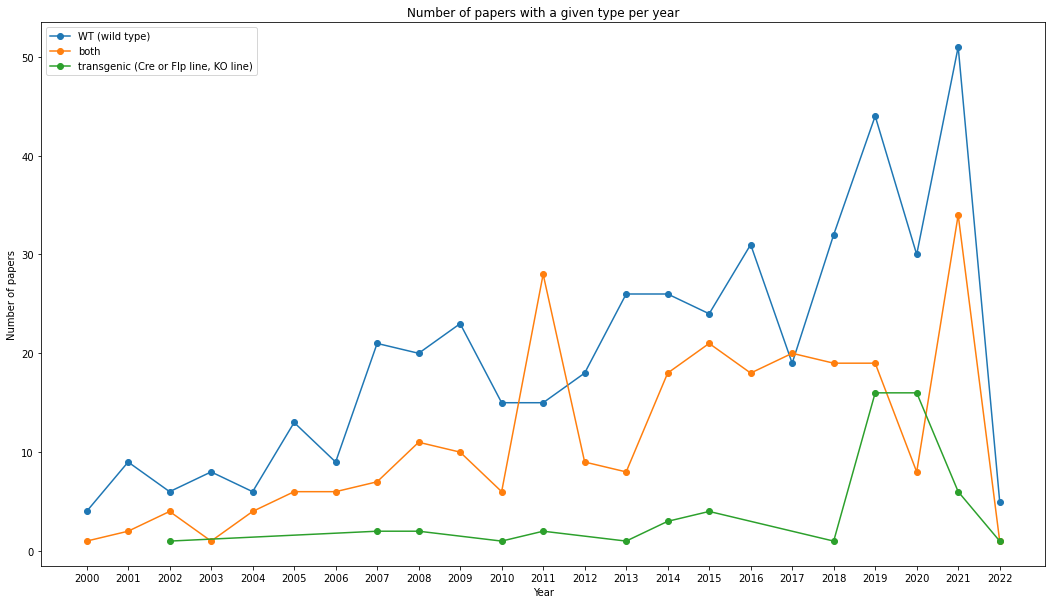

In [55]:
fig, ax = plt.subplots()

for subject_type in type_year_count["Subject Type"].unique():
    type_df = type_year_count[type_year_count["Subject Type"] == subject_type]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=subject_type)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given type per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_type.png")

## Trends in Age of the Subject

In [56]:
survey_df["Subject Age"]

0                                adult (12-24 weeks)
1           adult (12-24 weeks), adult (24-40 weeks)
2                                adult (12-24 weeks)
3           adult (12-24 weeks), adult (24-40 weeks)
4                                adult (24-40 weeks)
                           ...                      
664                              adult (24-40 weeks)
665       juvenile (3-7 weeks or week not specified)
666       juvenile (3-7 weeks or week not specified)
667    young adult (8-12 weeks), adult (12-24 weeks)
668                         young adult (8-12 weeks)
Name: Subject Age, Length: 669, dtype: object

In [57]:
column_name = "Subject Age"

In [58]:
fixed_column_name = column_name + "_fixed"

In [59]:
copy_of_survey_df = survey_df.copy()

In [60]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [61]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [62]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [63]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

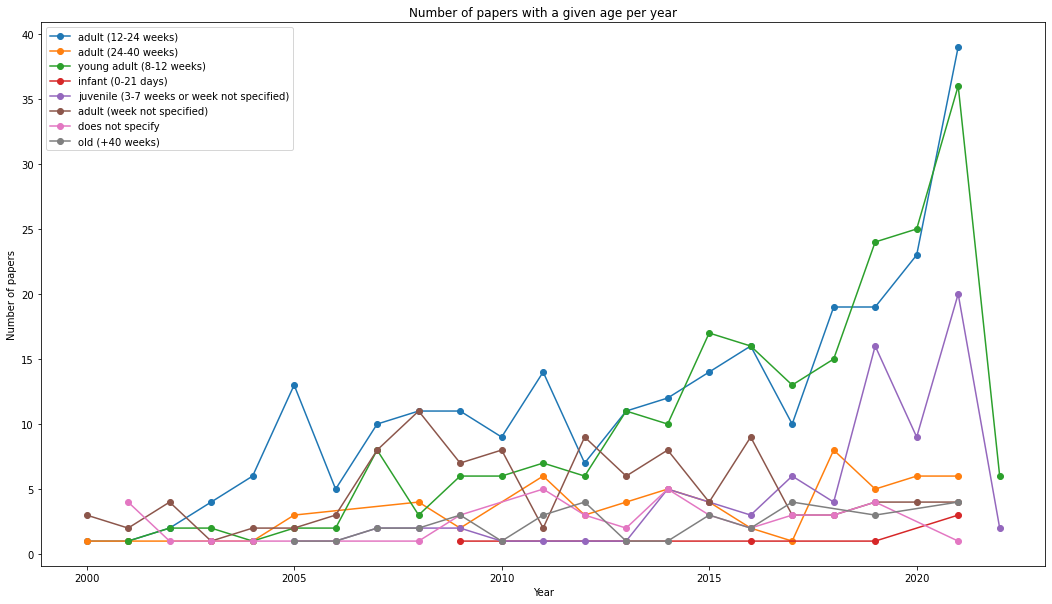

In [64]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given age per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_age.png")

## Trends in Housing of the Subject

In [65]:
survey_df["Subject Housing"]

0      group-housed, singly-housed for less than a we...
1                                          singly-housed
2                                           group-housed
3                                       does not specify
4                                           group-housed
                             ...                        
664                                         group-housed
665    group-housed, singly-housed for less than a we...
666                                         group-housed
667                                         group-housed
668                                         group-housed
Name: Subject Housing, Length: 669, dtype: object

In [66]:
column_name = "Subject Housing"

In [67]:
fixed_column_name = column_name + "_fixed"

In [68]:
copy_of_survey_df = survey_df.copy()

In [69]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [70]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [71]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [72]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

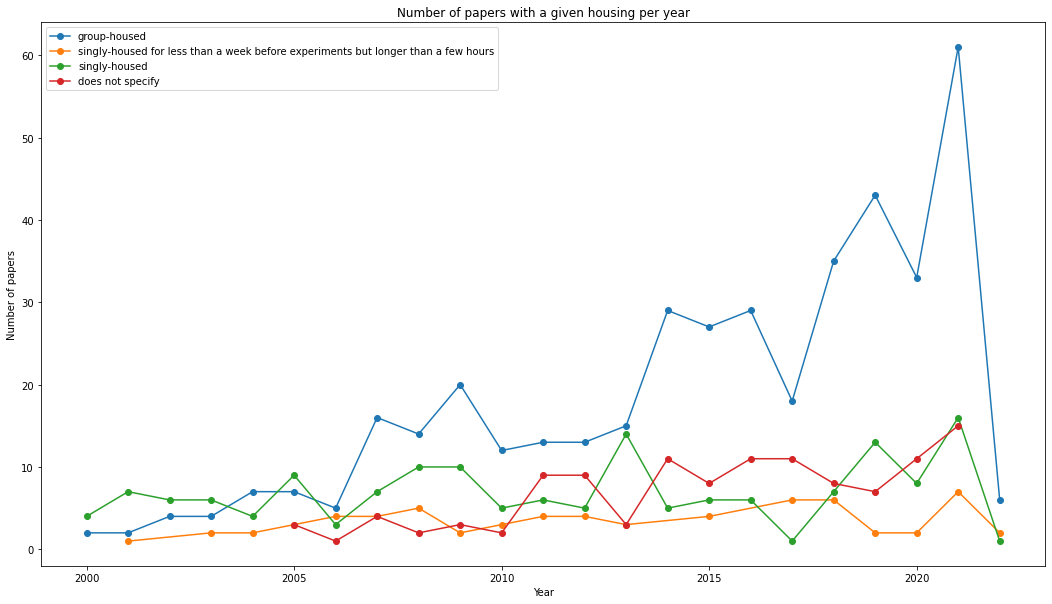

In [73]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given housing per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_housing.png")


## Trends in Age of the Subject

In [74]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "].unique()

array(['+5 min - hours of facetime and/or multiple exposure periods',
       'Does not specify',
       'multiple exposure periods (+5 min - hours of facetime)',
       '5 min exposure or less', '5 min exposure or less, littermate',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods',
       '5 min exposure or less, multiple exposure periods (+5 min - hours of facetime)',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods, littermate',
       'not specified', 'Unspecified',
       '+5 min - hours of facetime and/or multiple exposure periods, cage mate of less than a week',
       '+5 min - hours of facetime and/or multiple exposure periods, littermate',
       'cage mate (i.e. caged together for weeks+ but not from the same litter)',
       'offspring ', 'littermate',
       'Happens over multiple days but time each day unspecified'],
      dtype=object)

In [75]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "]

0      +5 min - hours of facetime and/or multiple exp...
1      +5 min - hours of facetime and/or multiple exp...
2                                       Does not specify
3      +5 min - hours of facetime and/or multiple exp...
4      +5 min - hours of facetime and/or multiple exp...
                             ...                        
664                               5 min exposure or less
665                               5 min exposure or less
666                               5 min exposure or less
667                               5 min exposure or less
668                               5 min exposure or less
Name: Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) , Length: 669, dtype: object

In [76]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [77]:
fixed_column_name = column_name + "_fixed"

In [78]:
copy_of_survey_df = survey_df.copy()

In [79]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [80]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [81]:
exploded_column_df


,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),...,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed"
0,0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,no,...,Yes,"Age, Sex","Yes, this one was tricky.",Subject strain,2003,1,0,[NOT_SPECIFIED],[NOT_SPECIFIED],+5 min - hours of facetime and/or multiple exp...
1,1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,no,...,Yes,None,"No, I feel confident, and I double-checked all...",,2019,1,0,[VGLUT3_KO],[VGLUT3_KO],+5 min - hours of facetime and/or multiple exp...
2,2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,...,Yes,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,"[C57BL6, 129SVEMSJ]",[129SVEMSJ mixed C57BL6],Does not specify
3,3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,no,...,Yes,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,[C57BL6N],[C57BL6N],+5 min - hours of facetime and/or multiple exp...
4,4,3/25/2022 14:35:06,Schizophrenia-relevant behaviours of female mi...,"Olaya, Juan",2018-11,Naeliz Lopez,,yes,Mice,no,...,Yes,"Age, Housing History, Type (WT vs transgenic)","Yes, this one was tricky.",Not sure on social agent strain and their hous...,2018,1,0,[C57BL6NTAC],[C57BL6NTAC],+5 min - hours of facetime and/or multiple exp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,664,4/26/2022 14:45:54,Congenital lack of nNOS impairs long-term soci...,"Juch, Mathias",2009-11,Erika Wangia,,yes,Mice,no,...,Yes,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",I don't understand whether nNOS-deficient coun...,2009,1,0,[C57BL6J],[C57BL6J],5 min exposure or less
700,665,4/30/2022 11:51:50,Altered social recognition memory and hypothal...,"Holman, Parker",2021-04,Erika Wangia,,yes,Rats,no,...,Yes,Type (WT vs transgenic),"No, I feel confident, and I double-checked all...",,2021,0,1,[SPRAGUE_DAWLEY],[SPRAGUE_DAWLEY],5 min exposure or less
701,666,4/30/2022 12:29:10,Social Behavior in Prepubertal Neurexin 1α Def...,"Kight, Katherine",2021-12,Erika Wangia,,yes,Rats,no,...,Yes,"Age, Strain","No, I feel confident, and I double-checked all...",,2021,0,1,[SPRAGUE_DAWLEY],[SPRAGUE_DAWLEY],5 min exposure or less
702,667,5/3/2022 14:23:40,Competition between two memory traces for long...,"Engelmann, Mario",2009-01,Erika Wangia,,yes,Mice,no,...,Yes,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",They keep the juvenile individually during the...,2009,1,0,[C57BL6JOLAHSD],[C57BL6JOLAHSD],5 min exposure or less


In [82]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [83]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

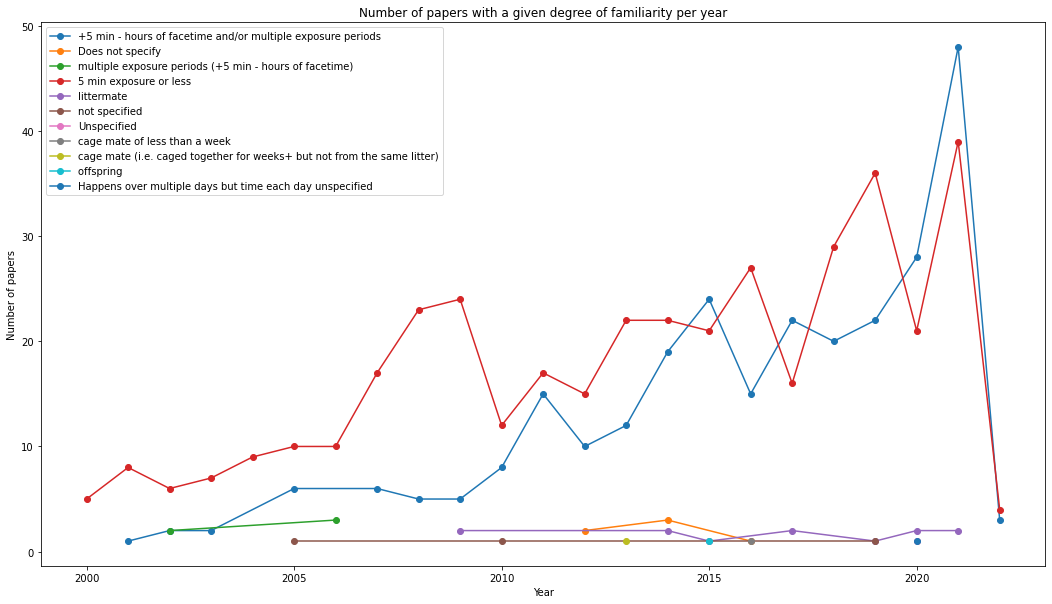

In [84]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given degree of familiarity per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_familiarity.png")

## Trends in Type of the Subject

In [85]:
survey_df["Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"]

0       no
1      yes
2      yes
3      yes
4      yes
      ... 
664    yes
665    yes
666    yes
667    yes
668     no
Name: Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject, Length: 669, dtype: object

In [86]:
column_name = "Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"

In [87]:
type_year_count = all_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [88]:
type_year_count

,publication_year,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Rank,Social Agent Type,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,2000,no,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,2000,yes,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2001,no,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,2001,yes,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2002,no,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5,2002,yes,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6,2003,no,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
7,2003,yes,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,2004,no,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
9,2004,yes,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [89]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

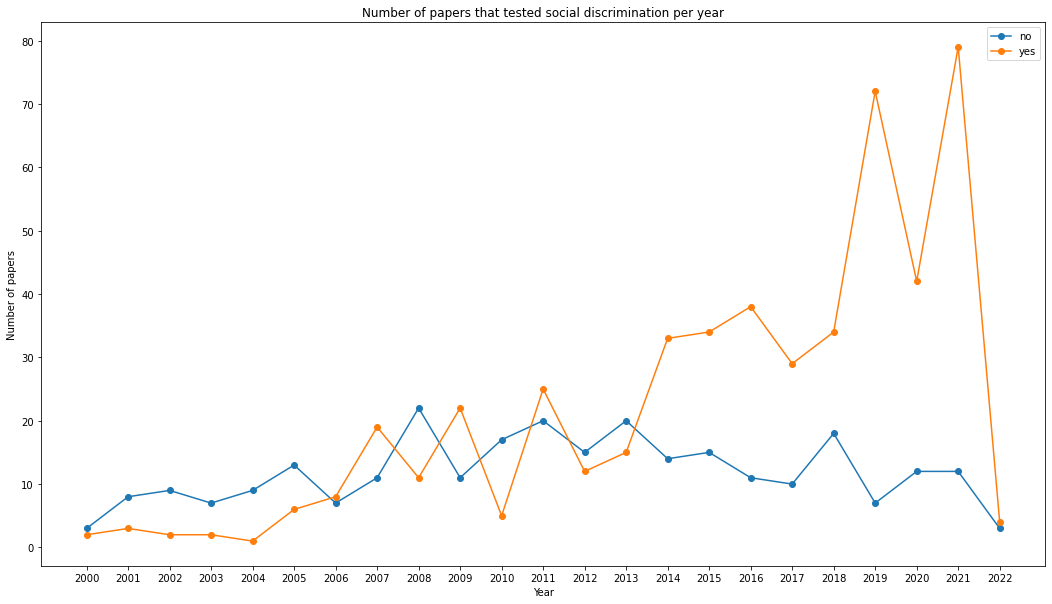

In [90]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers that tested social discrimination per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_discrimination.png")

## Trends in Type of the Subject

In [91]:
survey_df["Subject Social Rank"]

0      Does not specify
1      Does not specify
2      Does not specify
3      Does not specify
4      Does not specify
             ...       
664    Does not specify
665    Does not specify
666    Does not specify
667    Does not specify
668    Does not specify
Name: Subject Social Rank, Length: 669, dtype: object

In [92]:
column_name = "Subject Social Rank"

In [93]:
type_year_count = all_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [94]:
type_year_count

,publication_year,Subject Social Rank,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,2000,"Defeated, Does not specify",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2000,Does not specify,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,2001,Defeated,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2001,Does not specify,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,2002,Does not specify,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
5,2003,Does not specify,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6,2004,Does not specify,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
7,2005,Does not specify,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
8,2006,Does not specify,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
9,2007,Does not specify,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


In [95]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

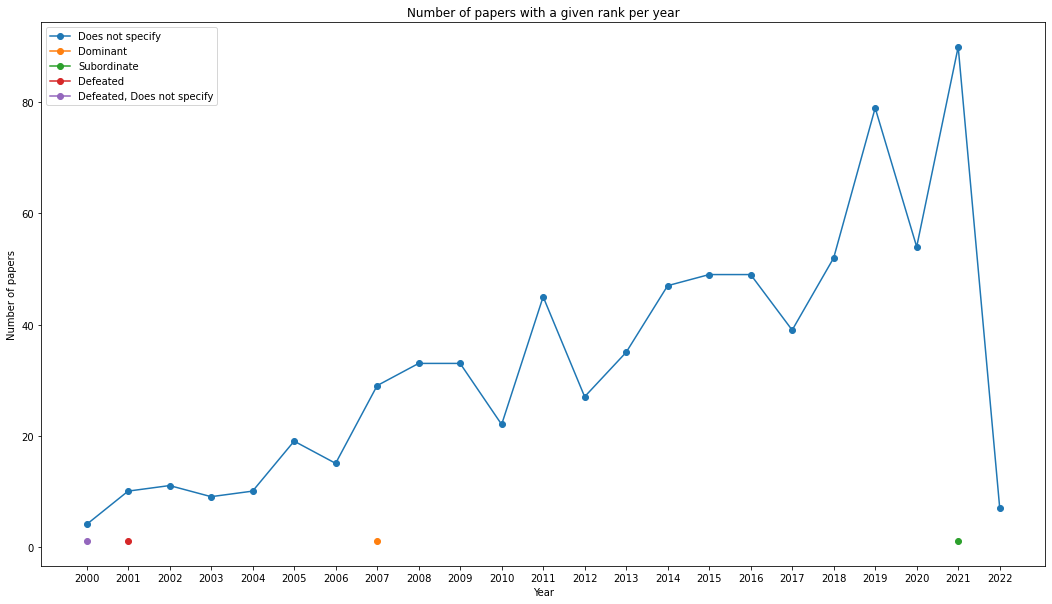

In [96]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given rank per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_rank.png")

## ITI by Species

In [97]:
survey_df["Intertrial Interval (ITI) (time between trials)"]

0                             +5 min - less than an hour
1                              1-6 hr, over 6 hr - 24 hr
2                                          not specified
3                                      over 6 hr - 24 hr
4                                          not specified
                             ...                        
664                            1-6 hr, over 6 hr - 24 hr
665                           +5 min - less than an hour
666                                        not specified
667                            1-6 hr, over 6 hr - 24 hr
668    +5 min - less than an hour, 1-6 hr, over 6 hr ...
Name: Intertrial Interval (ITI) (time between trials), Length: 669, dtype: object

In [98]:
column_name = "Intertrial Interval (ITI) (time between trials)"

In [99]:
fixed_column_name = column_name + "_fixed"

In [100]:
copy_of_survey_df = survey_df.copy()

In [101]:
copy_of_survey_df[column_name]

0                             +5 min - less than an hour
1                              1-6 hr, over 6 hr - 24 hr
2                                          not specified
3                                      over 6 hr - 24 hr
4                                          not specified
                             ...                        
664                            1-6 hr, over 6 hr - 24 hr
665                           +5 min - less than an hour
666                                        not specified
667                            1-6 hr, over 6 hr - 24 hr
668    +5 min - less than an hour, 1-6 hr, over 6 hr ...
Name: Intertrial Interval (ITI) (time between trials), Length: 669, dtype: object

In [102]:
#copy_of_survey_df[ pd.api.types.is_float_dtype(copy_of_survey_df[column_name])]

In [103]:
def debugfunc(x):
    print(x)
    return x.split(", ")


In [104]:
copy_of_survey_df[column_name]

0                             +5 min - less than an hour
1                              1-6 hr, over 6 hr - 24 hr
2                                          not specified
3                                      over 6 hr - 24 hr
4                                          not specified
                             ...                        
664                            1-6 hr, over 6 hr - 24 hr
665                           +5 min - less than an hour
666                                        not specified
667                            1-6 hr, over 6 hr - 24 hr
668    +5 min - less than an hour, 1-6 hr, over 6 hr ...
Name: Intertrial Interval (ITI) (time between trials), Length: 669, dtype: object

In [105]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: debugfunc(x))

+5 min - less than an hour
1-6 hr, over 6 hr - 24 hr
not specified
over 6 hr - 24 hr
not specified
1-5 minutes, +5 min - less than an hour
not specified
+5 min - less than an hour
1-5 minutes
1-5 minutes
+5 min - less than an hour
1-6 hr
+5 min - less than an hour
1-5 minutes
not specified
+5 min - less than an hour, 1-6 hr
1-6 hr
+5 min - less than an hour
+5 min - less than an hour
1-5 minutes
+5 min - less than an hour
1-6 hr
+5 min - less than an hour
+5 min - less than an hour
+5 min - less than an hour, 1-6 hr, over 6 hr - 24 hr, over 24 hrs
not specified
not specified
not specified
no ITI
1-5 minutes
not specified
+5 min - less than an hour
1-5 minutes
not specified
1-5 minutes
+5 min - less than an hour
not specified
1-6 hr
+5 min - less than an hour
+5 min - less than an hour
+5 min - less than an hour
not specified
not specified
+5 min - less than an hour
not specified
+5 min - less than an hour
1-6 hr, over 6 hr - 24 hr
+5 min - less than an hour
1-6 hr
1-6 hr
not specified


In [106]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()

In [107]:
column_rats_count = exploded_column_df.groupby(['Rats used', fixed_column_name], as_index=False).count()

In [108]:
column_mice_count = exploded_column_df.groupby(['Mice used', fixed_column_name], as_index=False).count()

In [109]:
edit_column_rats_count = column_rats_count[column_rats_count["Rats used"] == "1"]

In [110]:
rat_count = edit_column_rats_count["index"].sum()

In [111]:
rat_count

345

In [112]:
edit_column_mice_count = column_mice_count[column_mice_count["Mice used"] == "1"]

In [113]:
mouse_count = edit_column_mice_count["index"].sum()

In [114]:
mouse_count

484

In [115]:
edit_column_mice_count = edit_column_mice_count.set_index("Intertrial Interval (ITI) (time between trials)_fixed", inplace=False) 

In [116]:
edit_column_rats_count = edit_column_rats_count.set_index("Intertrial Interval (ITI) (time between trials)_fixed", inplace=False) 

In [117]:
edit_column_mice_count

,Mice used,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Rats used,all_processed_strains,per_subject_processed_strains
Intertrial Interval (ITI) (time between trials)_fixed,,,,,,,,,,,,,,,,,,,,,
+5 min - less than an hour,1,149,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
1-5 minutes,1,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
1-6 hr,1,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
no ITI,1,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
not specified,1,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
over 24 hrs,1,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
over 6 hr - 24 hr,1,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71


In [118]:
edit_column_mice_count = edit_column_mice_count.reindex(["no ITI","1-5 minutes","+5 min - less than an hour","1-6 hr", "over 6 hr - 24 hr", "over 24 hrs", "not specified"])

In [119]:
edit_column_rats_count = edit_column_rats_count.reindex(["no ITI","1-5 minutes","+5 min - less than an hour","1-6 hr", "over 6 hr - 24 hr", "over 24 hrs", "not specified"])

In [120]:
#edit_column_mice_count["Intertrial Interval (ITI) (time between trials)_fixed"]

In [121]:
edit_column_mice_count["index"] = edit_column_mice_count["index"].mul(100)
edit_column_rats_count["index"] = edit_column_rats_count["index"].mul(100)
edit_column_mice_count

,Mice used,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Rats used,all_processed_strains,per_subject_processed_strains
Intertrial Interval (ITI) (time between trials)_fixed,,,,,,,,,,,,,,,,,,,,,
no ITI,1,1900,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
1-5 minutes,1,5100,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
+5 min - less than an hour,1,14900,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
1-6 hr,1,7400,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
over 6 hr - 24 hr,1,7100,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
over 24 hrs,1,1100,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
not specified,1,10900,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


In [122]:
edit_column_mice_count["index"] = edit_column_mice_count["index"].div(484)
edit_column_rats_count["index"] = edit_column_rats_count["index"].div(345)
edit_column_mice_count

,Mice used,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Rats used,all_processed_strains,per_subject_processed_strains
Intertrial Interval (ITI) (time between trials)_fixed,,,,,,,,,,,,,,,,,,,,,
no ITI,1,3.925620,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
1-5 minutes,1,10.537190,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
+5 min - less than an hour,1,30.785124,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
1-6 hr,1,15.289256,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
over 6 hr - 24 hr,1,14.669421,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
over 24 hrs,1,2.272727,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
not specified,1,22.520661,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


In [123]:
plt.rcParams["figure.figsize"] = (18,10)

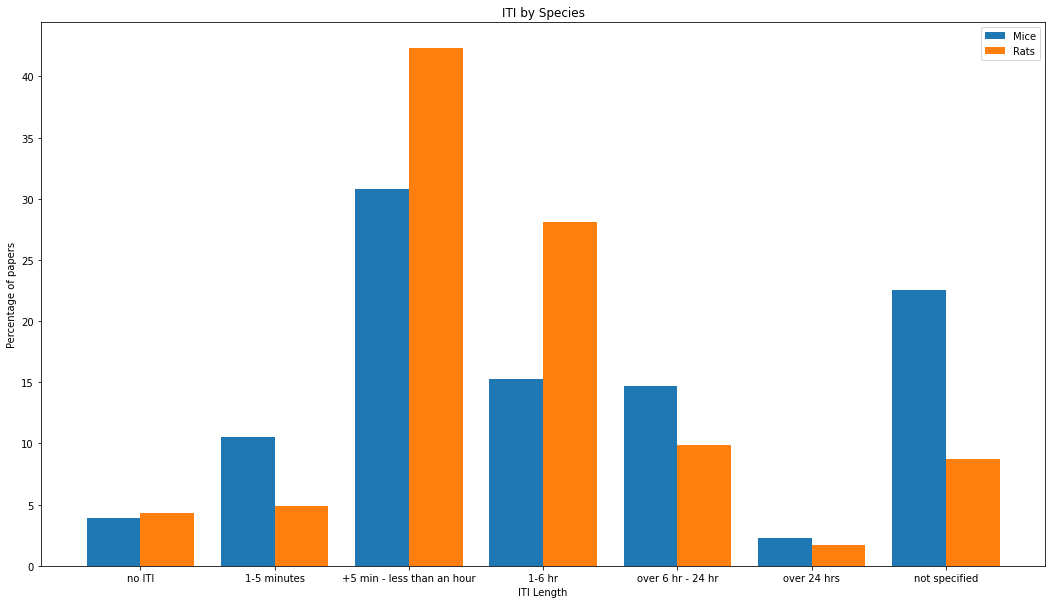

In [124]:
_ITI = np.arange(len(edit_column_rats_count.index))

plt.bar(_ITI - 0.2, edit_column_mice_count["index"], 0.4, label = "Mice")
plt.bar(_ITI + 0.2, edit_column_rats_count["index"], 0.4, label = "Rats")
plt.xticks(_ITI, edit_column_rats_count.index)
plt.legend()
plt.title("ITI by Species")
plt.xlabel("ITI Length")
plt.ylabel("Percentage of papers")
plt.savefig("./proc/plots/ITIbyspecies.png")

# Degree of Familiarity

In [125]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "]

0      +5 min - hours of facetime and/or multiple exp...
1      +5 min - hours of facetime and/or multiple exp...
2                                       Does not specify
3      +5 min - hours of facetime and/or multiple exp...
4      +5 min - hours of facetime and/or multiple exp...
                             ...                        
664                               5 min exposure or less
665                               5 min exposure or less
666                               5 min exposure or less
667                               5 min exposure or less
668                               5 min exposure or less
Name: Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) , Length: 669, dtype: object

In [126]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [127]:
fixed_column_name = column_name + "_fixed"

In [128]:
copy_of_survey_df = survey_df.copy()

In [129]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [130]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [131]:
column_degree_count = exploded_column_df.groupby([fixed_column_name], as_index=False).count()

In [132]:
column_degree_count

,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed",index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains
0,+5 min - hours of facetime and/or multiple exp...,273,273,273,273,273,273,273,273,273,...,273,273,273,273,273,273,273,273,273,273
1,5 min exposure or less,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
2,Does not specify,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3,Happens over multiple days but time each day u...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Unspecified,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,cage mate (i.e. caged together for weeks+ but ...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,cage mate of less than a week,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,littermate,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
8,multiple exposure periods (+5 min - hours of f...,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
9,not specified,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


# Social Agent Ages by Sex

In [133]:
survey_df["Social Agent Sex"]

0                     always female
1                     always female
2                     always female
3                     always female
4                     always female
                   ...             
664    Uses both, Does not specifiy
665    Uses both, Does not specifiy
666    Uses both, Does not specifiy
667    Uses both, Does not specifiy
668    Uses both, Does not specifiy
Name: Social Agent Sex, Length: 669, dtype: object

In [134]:
survey_df["Social Agent Age (check all that apply)"]

0                             adult (12-24 weeks)
1                             adult (12-24 weeks)
2                             adult (12-24 weeks)
3        adult (12-24 weeks), adult (24-40 weeks)
4                             adult (24-40 weeks)
                          ...                    
664    juvenile (3-7 weeks or week not specified)
665    juvenile (3-7 weeks or week not specified)
666    juvenile (3-7 weeks or week not specified)
667    juvenile (3-7 weeks or week not specified)
668    juvenile (3-7 weeks or week not specified)
Name: Social Agent Age (check all that apply), Length: 669, dtype: object

In [135]:
column_name = "Social Agent Sex"
column_name_2 = "Social Agent Age (check all that apply)"

In [136]:
fixed_column_name = column_name + "_fixed"
fixed_column_name_2 = column_name_2 + "_fixed"

In [137]:
copy_of_survey_df = survey_df.copy()

In [138]:
def debugfunc(x):
    print(x)
    return x.split(", ")

In [139]:
copy_of_survey_df[column_name]
copy_of_survey_df[column_name_2]

0                             adult (12-24 weeks)
1                             adult (12-24 weeks)
2                             adult (12-24 weeks)
3        adult (12-24 weeks), adult (24-40 weeks)
4                             adult (24-40 weeks)
                          ...                    
664    juvenile (3-7 weeks or week not specified)
665    juvenile (3-7 weeks or week not specified)
666    juvenile (3-7 weeks or week not specified)
667    juvenile (3-7 weeks or week not specified)
668    juvenile (3-7 weeks or week not specified)
Name: Social Agent Age (check all that apply), Length: 669, dtype: object

In [140]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: debugfunc(x))
copy_of_survey_df[fixed_column_name_2] = copy_of_survey_df[column_name_2].apply(lambda x: debugfunc(x))

always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always female
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male
always male


In [158]:
copy_of_survey_df

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Social Agent Age (check all that apply)_fixed
0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,no,Not specified,...,"Age, Sex","Yes, this one was tricky.",Subject strain,2003,1,0,[NOT_SPECIFIED],[NOT_SPECIFIED],[always female],[adult (12-24 weeks)]
1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,no,VGluT3 KO,...,None,"No, I feel confident, and I double-checked all...",,2019,1,0,[VGLUT3_KO],[VGLUT3_KO],[always female],[adult (12-24 weeks)]
2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,no,C57BL/6 mixed with 129/SvEmsJ,...,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,"[C57BL6, 129SVEMSJ]",[129SVEMSJ mixed C57BL6],[always female],[adult (12-24 weeks)]
3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,no,C57BL/6N,...,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,[C57BL6N],[C57BL6N],[always female],"[adult (12-24 weeks), adult (24-40 weeks)]"
4,3/25/2022 14:35:06,Schizophrenia-relevant behaviours of female mi...,"Olaya, Juan",2018-11,Naeliz Lopez,,yes,Mice,no,C57BL/6NTac,...,"Age, Housing History, Type (WT vs transgenic)","Yes, this one was tricky.",Not sure on social agent strain and their hous...,2018,1,0,[C57BL6NTAC],[C57BL6NTAC],[always female],[adult (24-40 weeks)]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,4/26/2022 14:45:54,Congenital lack of nNOS impairs long-term soci...,"Juch, Mathias",2009-11,Erika Wangia,,yes,Mice,no,C57BL/6J,...,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",I don't understand whether nNOS-deficient coun...,2009,1,0,[C57BL6J],[C57BL6J],"[Uses both, Does not specifiy]",[juvenile (3-7 weeks or week not specified)]
665,4/30/2022 11:51:50,Altered social recognition memory and hypothal...,"Holman, Parker",2021-04,Erika Wangia,,yes,Rats,no,Sprague-Dawley,...,Type (WT vs transgenic),"No, I feel confident, and I double-checked all...",,2021,0,1,[SPRAGUE_DAWLEY],[SPRAGUE_DAWLEY],"[Uses both, Does not specifiy]",[juvenile (3-7 weeks or week not specified)]
666,4/30/2022 12:29:10,Social Behavior in Prepubertal Neurexin 1α Def...,"Kight, Katherine",2021-12,Erika Wangia,,yes,Rats,no,Sprague Dawley,...,"Age, Strain","No, I feel confident, and I double-checked all...",,2021,0,1,[SPRAGUE_DAWLEY],[SPRAGUE_DAWLEY],"[Uses both, Does not specifiy]",[juvenile (3-7 weeks or week not specified)]
667,5/3/2022 14:23:40,Competition between two memory traces for long...,"Engelmann, Mario",2009-01,Erika Wangia,,yes,Mice,no,C57BL/6JOlaHsd,...,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",They keep the juvenile individually during the...,2009,1,0,[C57BL6JOLAHSD],[C57BL6JOLAHSD],"[Uses both, Does not specifiy]",[juvenile (3-7 weeks or week 

In [142]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()
exploded_column_df = exploded_column_df.explode(fixed_column_name_2).reset_index()

In [143]:
exploded_column_df

,level_0,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Social Agent Age (check all that apply)_fixed
0,0,0,4/5/2022 14:42:30,An estrogen-dependent four-gene micronet regul...,"Choleris, Elena",2003-05,Naeliz Lopez,,yes,Mice,...,"Age, Sex","Yes, this one was tricky.",Subject strain,2003,1,0,[NOT_SPECIFIED],[NOT_SPECIFIED],always female,adult (12-24 weeks)
1,1,1,4/8/2022 17:33:41,Consequences of VGluT3 deficiency on learning ...,"Fazekas, Csilla",2019-10,Amelia Chambers,,yes,Mice,...,None,"No, I feel confident, and I double-checked all...",,2019,1,0,[VGLUT3_KO],[VGLUT3_KO],always female,adult (12-24 weeks)
2,2,2,4/26/2022 10:41:58,Brain and behaviour phenotyping of a mouse mod...,"Petrella, L.",2016-09,Jocelyn Santiago Perez,,yes,Mice,...,"Age, Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",,2016,1,0,"[C57BL6, 129SVEMSJ]",[129SVEMSJ mixed C57BL6],always female,adult (12-24 weeks)
3,3,3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,...,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,[C57BL6N],[C57BL6N],always female,adult (12-24 weeks)
4,3,3,3/29/2022 15:21:07,Postnatal immune activation causes social defi...,"Lopez-Aranda, Manuel",2021-09,Erika Wangia,,yes,Mice,...,Age,"No, I feel confident, and I double-checked all...",,2021,1,0,[C57BL6N],[C57BL6N],always female,adult (24-40 weeks)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1099,666,4/30/2022 12:29:10,Social Behavior in Prepubertal Neurexin 1α Def...,"Kight, Katherine",2021-12,Erika Wangia,,yes,Rats,...,"Age, Strain","No, I feel confident, and I double-checked all...",,2021,0,1,[SPRAGUE_DAWLEY],[SPRAGUE_DAWLEY],Does not specifiy,juvenile (3-7 weeks or week not specified)
1226,1100,667,5/3/2022 14:23:40,Competition between two memory traces for long...,"Engelmann, Mario",2009-01,Erika Wangia,,yes,Mice,...,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",They keep the juvenile individually during the...,2009,1,0,[C57BL6JOLAHSD],[C57BL6JOLAHSD],Uses both,juvenile (3-7 weeks or week not specified)
1227,1101,667,5/3/2022 14:23:40,Competition between two memory traces for long...,"Engelmann, Mario",2009-01,Erika Wangia,,yes,Mice,...,"Strain, Type (WT vs transgenic)","Yes, this one was tricky.",They keep the juvenile individually during the...,2009,1,0,[C57BL6JOLAHSD],[C57BL6JOLAHSD],Does not specifiy,juvenile (3-7 weeks or week not specified)
1228,1102,668,3/1/2022 10:11:55,A neural cell adhesion molecule–derived fibrob...,"Secher, Thomas",2006-09,Meghan Cum,,yes,Rats,...,"Strain, Housing History, Type (WT vs transgenic)",,,2006,0,1,[WISTER],[WISTER],Uses both,juvenile (3-7 weeks or week not specified)


In [144]:
exploded_column_df["Male Social Agent"] = exploded_column_df[fixed_column_name].apply(lambda x: "1" if x == "always male" or x == "Uses both" else "0")
exploded_column_df["Female Social Agent"] = exploded_column_df[fixed_column_name].apply(lambda x: "1" if x == "always female" or x == "Uses both" else "0")

In [145]:
column_male_count = exploded_column_df.groupby(['Male Social Agent', fixed_column_name_2], as_index=False).count()
edit_column_male_count = column_male_count[column_male_count["Male Social Agent"] == "1"]

column_female_count = exploded_column_df.groupby(['Female Social Agent', fixed_column_name_2], as_index=False).count()
edit_column_female_count = column_female_count[column_female_count["Female Social Agent"] == "1"]

edit_column_male_count

,Male Social Agent,Social Agent Age (check all that apply)_fixed,level_0,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)",...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Female Social Agent
8,1,adult (12-24 weeks),45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
9,1,adult (24-40 weeks),24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
10,1,adult (week not specified),18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
11,1,does not specify,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
12,1,infant (0-21 days),6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
13,1,juvenile (3-7 weeks or week not specified),277,277,277,277,277,277,277,277,...,277,277,277,277,277,277,277,277,277,277
14,1,old (+40 weeks),6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
15,1,young adult (8-12 weeks),57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57


In [146]:
edit_column_female_count

,Female Social Agent,Social Agent Age (check all that apply)_fixed,level_0,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)",...,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,Mice used,Rats used,all_processed_strains,per_subject_processed_strains,Social Agent Sex_fixed,Male Social Agent
8,1,adult (12-24 weeks),32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
9,1,adult (24-40 weeks),14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
10,1,adult (week not specified),20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
11,1,does not specify,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
12,1,juvenile (3-7 weeks or week not specified),71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
13,1,old (+40 weeks),6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
14,1,young adult (8-12 weeks),33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


In [159]:
exploded_column_df["Same Sex Social Agent"] = exploded_column_df["Social Agent Sex_fixed"].apply(lambda x: "1" if x == "same sex as subject" else "0")
exploded_column_df["Opposite Sex Social Agent"] = exploded_column_df["Social Agent Sex_fixed"].apply(lambda x: "1" if x == "opposite sex as subject" else "0")

In [182]:
column_same_count = exploded_column_df.groupby(['Same Sex Social Agent', fixed_column_name_2], as_index=False).size()
edit_column_same_count = column_same_count[column_same_count["Same Sex Social Agent"] == "1"]

column_opposite_count = exploded_column_df.groupby(['Opposite Sex Social Agent', fixed_column_name_2], as_index=False).size()
edit_column_opposite_count = column_opposite_count[column_opposite_count["Opposite Sex Social Agent"] == "1"]

In [184]:
infant_dict = {"Opposite Sex Social Agent": ["1"], "Social Agent Age (check all that apply)_fixed": ["infant (0-21 days)"], "size": [0]}
  
infant_df = pd.DataFrame.from_dict(infant_dict)
  
edit_column_opposite_count = pd.concat([edit_column_opposite_count, infant_df], ignore_index = True)


In [185]:
edit_column_opposite_count


,Opposite Sex Social Agent,Social Agent Age (check all that apply)_fixed,size
0,1,adult (12-24 weeks),8
1,1,adult (24-40 weeks),3
2,1,adult (week not specified),8
3,1,does not specify,25
4,1,juvenile (3-7 weeks or week not specified),14
5,1,old (+40 weeks),1
6,1,young adult (8-12 weeks),7
7,1,infant (0-21 days),0


In [162]:
edit_column_male_count = edit_column_male_count.set_index(fixed_column_name_2, inplace=False) 
edit_column_female_count = edit_column_female_count.set_index(fixed_column_name_2, inplace=False) 

KeyError: "None of ['Social Agent Age (check all that apply)_fixed'] are in the columns"

In [186]:
edit_column_same_count = edit_column_same_count.set_index("Social Agent Age (check all that apply)_fixed", inplace=False) 
edit_column_opposite_count = edit_column_opposite_count.set_index("Social Agent Age (check all that apply)_fixed", inplace=False) 

In [187]:
edit_column_opposite_count

,Opposite Sex Social Agent,size
Social Agent Age (check all that apply)_fixed,,
adult (12-24 weeks),1,8
adult (24-40 weeks),1,3
adult (week not specified),1,8
does not specify,1,25
juvenile (3-7 weeks or week not specified),1,14
old (+40 weeks),1,1
young adult (8-12 weeks),1,7
infant (0-21 days),1,0


In [188]:
edit_column_male_count = edit_column_male_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_female_count = edit_column_female_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_same_count = edit_column_same_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_opposite_count = edit_column_opposite_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])


In [198]:
edit_column_male_count["index"].sum()

469

In [199]:
edit_column_female_count["index"].sum()

226.0

In [215]:
plt.rcParams["figure.figsize"] = (18,10)

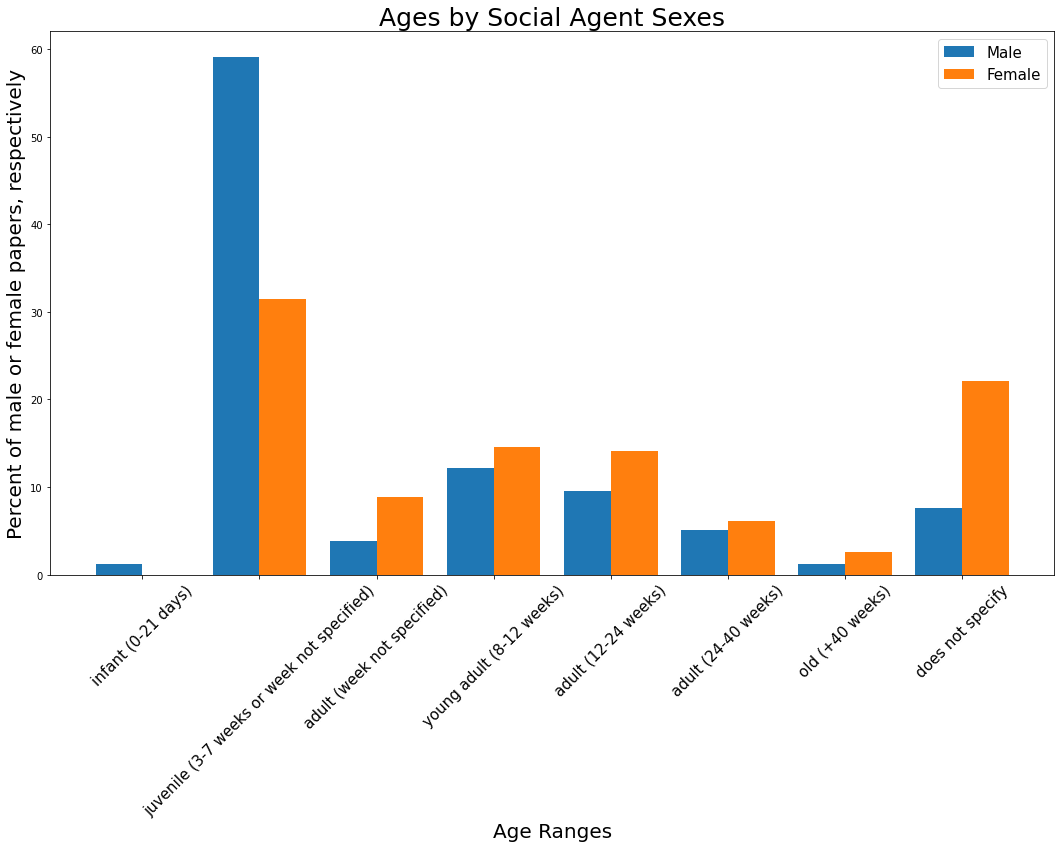

In [216]:
_ITI = np.arange(len(edit_column_male_count.index))

plt.bar(_ITI - 0.2, edit_column_male_count["index"] / 469 * 100, 0.4, label = "Male")
plt.bar(_ITI + 0.2, edit_column_female_count["index"] / 226 * 100, 0.4, label = "Female")
plt.xticks(_ITI, edit_column_male_count.index)
plt.legend(fontsize= 15)
plt.xticks(rotation=45, fontsize = 15)
plt.title("Ages by Social Agent Sexes", fontsize = 25)
plt.xlabel("Age Ranges", fontsize = 20)
plt.ylabel("Percent of male or female papers, respectively", fontsize = 20)
plt.savefig("./proc/plots/AgebySASex.png")

In [217]:
edit_column_opposite_count["size"].sum()

66

In [218]:
edit_column_same_count["size"].sum()

449

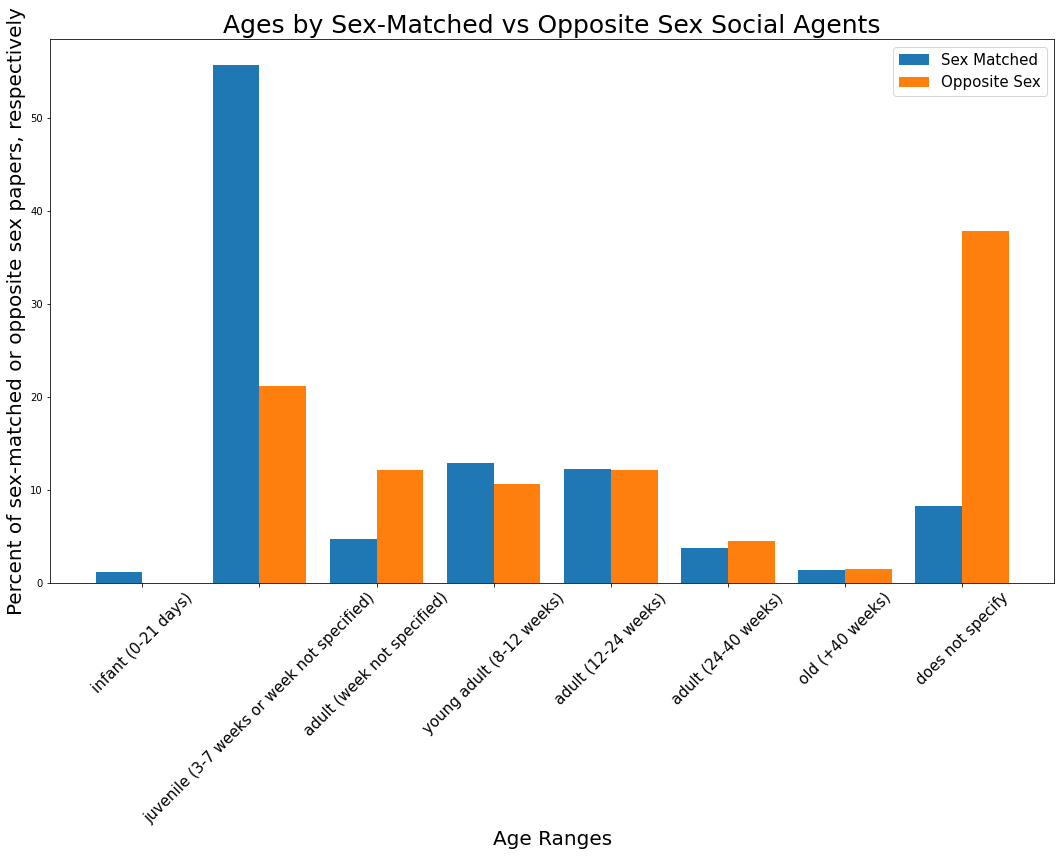

In [219]:
_ITI = np.arange(len(edit_column_same_count.index))

plt.bar(_ITI - 0.2, edit_column_same_count["size"] / 449 * 100, 0.4, label = "Sex Matched")
plt.bar(_ITI + 0.2, edit_column_opposite_count["size"] / 66 * 100, 0.4, label = "Opposite Sex")
plt.xticks(_ITI, edit_column_same_count.index)
plt.legend(fontsize = 15)
plt.xticks(rotation=45, fontsize=15)
plt.title("Ages by Sex-Matched vs Opposite Sex Social Agents", fontsize=25)
plt.xlabel("Age Ranges", fontsize=20)
plt.ylabel("Percent of sex-matched or opposite sex papers, respectively", fontsize=20)
plt.savefig("./proc/plots/AgebySASexMatch.png")